<a href="https://colab.research.google.com/github/blwolhppt/ML/blob/master/%D0%9A%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Контрольная работа**

In [153]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

data = fetch_openml('liver-disorders')



/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**№2. Загрузите нужный вам датасет, выведите его основные характеристики: количество строк и столбцов, типы данных, количество значений в каждом столбце, основную статистическую информацию об атрибутах.**

In [154]:
X = data.data
y = data.target

In [155]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   mcv      345 non-null    int64
 1   alkphos  345 non-null    int64
 2   sgpt     345 non-null    int64
 3   sgot     345 non-null    int64
 4   gammagt  345 non-null    int64
dtypes: int64(5)
memory usage: 13.6 KB


In [156]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 345 entries, 0 to 344
Series name: drinks
Non-Null Count  Dtype  
--------------  -----  
345 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [157]:
X.describe()

,mcv,alkphos,sgpt,sgot,gammagt
count,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058
std,4.448096,18.347670,19.512309,10.064494,39.254616
min,65.000000,23.000000,4.000000,5.000000,5.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000


In [158]:
y.describe()

count    345.000000
mean       3.455072
std        3.337835
min        0.000000
25%        0.500000
50%        3.000000
75%        6.000000
max       20.000000
Name: drinks, dtype: float64

**№3. Прочитайте и изложите в работе общее описание датасета. Опишите, решаемую моделированием проблему.**

 **№4. Удалите, если нужно, нечисловые колонки в датасете.**

**№5. При необходимости заполните нулем пропущенные значения.**

In [159]:
X.isna().any() 

mcv        False
alkphos    False
sgpt       False
sgot       False
gammagt    False
dtype: bool

In [160]:
from sklearn.impute import SimpleImputer
import numpy as np
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

imp.fit_transform(X)

array([[85, 92, 45, 27, 31],
       [85, 64, 59, 32, 23],
       [86, 54, 33, 16, 54],
       ...,
       [98, 77, 55, 35, 89],
       [91, 68, 27, 26, 14],
       [98, 99, 57, 45, 65]])

**№6. Постройте гистограммы распределения по каждому признаку.**

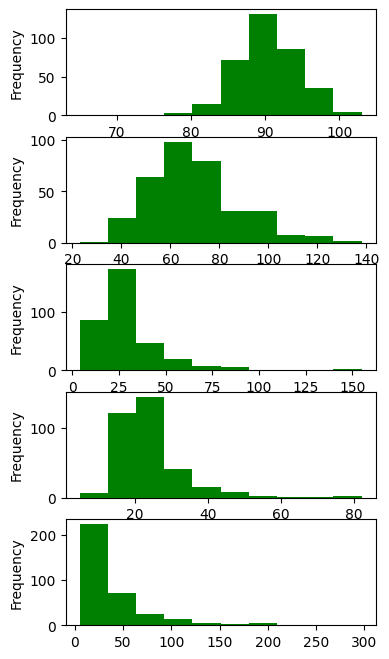

In [161]:
fig, axes = plt.subplots(len(X.columns), 1, figsize=(4, 8))

for i, col in enumerate(X.columns):
    X[col].plot(kind='hist', bins=10, ax=axes[i], color='green')

**№7. Постройте модель машинного обучения, обучите ее на всем датасете.**

In [162]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)
y_pred = model.predict(X)


**№8. Измерьте эффективность данной модели и сделайте вывод о ее применимости на практике.**

In [163]:
model.score(X, y)

0.18829428215833388

**№9. Визуализируйте результаты моделирования, сравните реальные и предсказанные значения.**


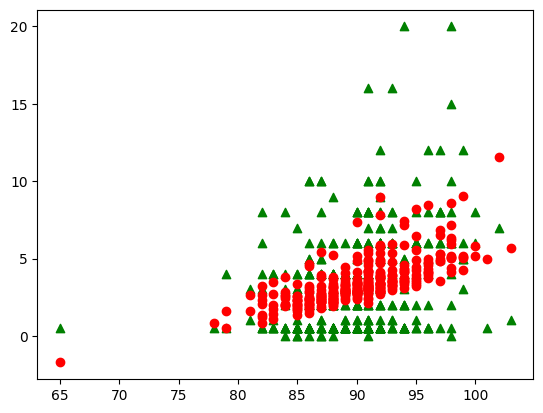

In [164]:
plt.scatter(X.iloc[:, 0], y, color='green', marker='^') # реальные значения
plt.scatter(X.iloc[:, 0], y_pred, color='red', marker='o') # предсказанные значения

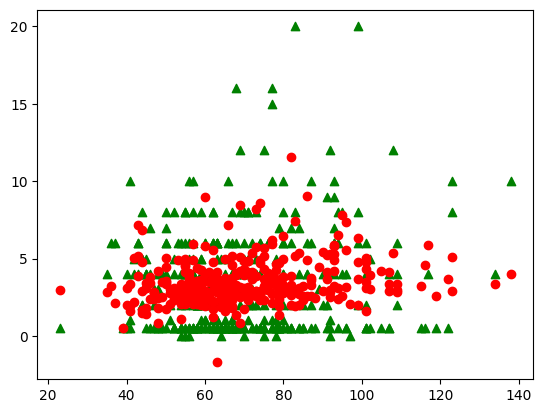

In [165]:
plt.scatter(X.iloc[:, 1], y, color='green', marker='^')   # реальные значения
plt.scatter(X.iloc[:, 1], y_pred, color='red', marker='o')  # предсказанные значения

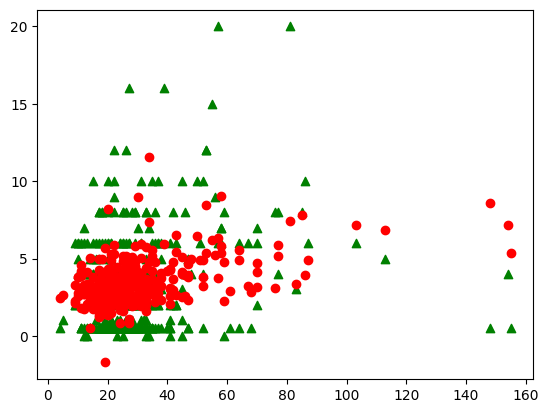

In [166]:
plt.scatter(X.iloc[:, 2], y, color='green', marker='^')   # реальные значения
plt.scatter(X.iloc[:, 2], y_pred, color='red', marker='o')  # предсказанные значения

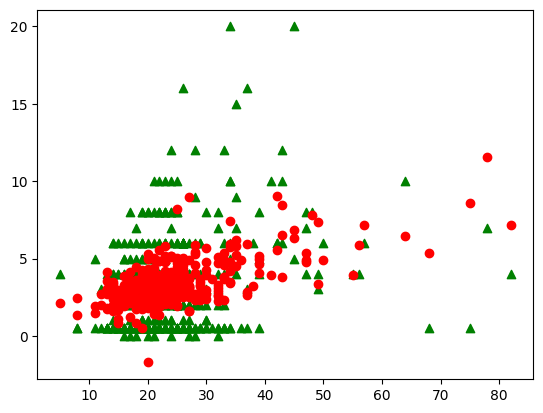

In [167]:
plt.scatter(X.iloc[:, 3], y, color='green', marker='^')   # реальные значения
plt.scatter(X.iloc[:, 3], y_pred, color='red', marker='o')  # предсказанные значения

**№10. Используйте несколько простых моделей машинного обучения. Сравните их эффективность между собой.**


In [168]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(X, y)
forest_model.score(X, y)

0.8774486749100573

In [169]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X, y)
ridge_model.score(X, y)

0.1882942808378305